In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 獲得所有台灣109年度生育率資料
taiwan_data = pd.read_csv('./data/birth-109.csv')
taiwan_data.head()

id  statistic_yyy site_id birth_order birth_sex mother_age  birth_count
0   1            109  新北市板橋區          1胎         男      未滿15歲            0
1   2            109  新北市板橋區          1胎         男     15～19歲            8
2   3            109  新北市板橋區          1胎         男     20～24歲           86
3   4            109  新北市板橋區          1胎         男     25～29歲          254
4   5            109  新北市板橋區          1胎         男     30～34歲          378

In [3]:
# 使用slice分割縣市與地區，將分割的縣市資料套用進原本資料內
taiwan_data['city'] = taiwan_data.site_id.str[:3]
taiwan_data

id  statistic_yyy site_id birth_order birth_sex mother_age  \
0          1            109  新北市板橋區          1胎         男      未滿15歲   
1          2            109  新北市板橋區          1胎         男     15～19歲   
2          3            109  新北市板橋區          1胎         男     20～24歲   
3          4            109  新北市板橋區          1胎         男     25～29歲   
4          5            109  新北市板橋區          1胎         男     30～34歲   
...      ...            ...     ...         ...       ...        ...   
59611  59612            109  連江縣東引鄉        9胎以上         女     30～34歲   
59612  59613            109  連江縣東引鄉        9胎以上         女     35～39歲   
59613  59614            109  連江縣東引鄉        9胎以上         女     40～44歲   
59614  59615            109  連江縣東引鄉        9胎以上         女     45～49歲   
59615  59616            109  連江縣東引鄉        9胎以上         女      50歲以上   

       birth_count city  
0                0  新北市  
1                8  新北市  
2               86  新北市  
3              254  新北市  
4              378  新北市  
...            ...  ...  
59611            0  連江縣  
59612            0  連江縣  
59613            0  連江縣  
59614            0  連江縣  
59615            0  連江縣  

[59616 rows x 8 columns]

In [4]:
# 查詢所有 matplotlib支援的 fonts
# from matplotlib import font_manager
# font_set = {f.name for f in font_manager.fontManager.ttflist}
# for f in font_set:
#     print(f)

Miriam Mono CLM
Noto Serif Armenian
Noto Sans Hebrew
Franklin Gothic Medium
Frank Ruhl Hofshi
Ebrima
Calibri
Sitka Small
Myanmar Text
Malgun Gothic
Gentium Book Basic
Scheherazade
STIXSizeOneSym
David Libre
Leelawadee UI
qtquickcontrols
Alef
Microsoft Himalaya
cmex10
SimSun-ExtB
Webdings
Noto Serif Georgian
Carlito
Segoe UI Historic
DejaVu Serif
Noto Sans Armenian
Wingdings
Miriam Libre
Source Sans Pro
Verdana
Linux Libertine Display G
Palatino Linotype
Yu Gothic
Miriam CLM
cmmi10
Segoe Print
OpenSymbol
Javanese Text
Linux Libertine G
KacstBook
Amiri
DejaVu Sans Display
Noto Sans Lao
Corbel
Mongolian Baiti
Source Serif Pro
Lucida Console
Noto Sans Lisu
Candara
Noto Serif Lao
Bahnschrift
Gentium Basic
Cambria
Segoe UI
Marlett
STIXSizeFiveSym
SimHei
Noto Sans Georgian
Segoe UI Emoji
cmb10
Ink Free
DFKai-SB
Segoe MDL2 Assets
MingLiU
Courier New
STIXSizeThreeSym
Tahoma
DejaVu Serif Display
Noto Sans Arabic UI
Trebuchet MS
EmojiOne Color
Noto Naskh Arabic UI
Microsoft PhagsPa
Reem Kufi
Gadu

In [ ]:
# 設定font給中文使用，避免亂碼
sns.set(font='SimHei')

<AxesSubplot:xlabel='count', ylabel='city'>

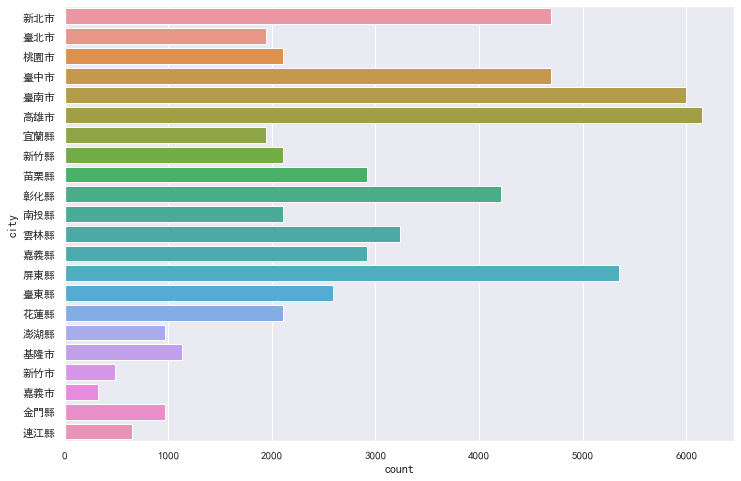

In [5]:
# 顯示各縣市的所有出生人數
plt.figure(figsize=(12,8))
sns.countplot(y='city', data=taiwan_data)

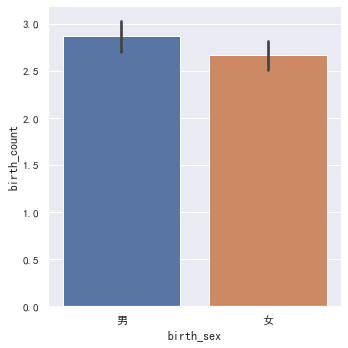

In [6]:
# 全國出生人數的男女比較
g = sns.catplot(x='birth_sex', y='birth_count', data=taiwan_data, kind='bar')

In [7]:
# 高雄市的出生人數
kaohsiung = taiwan_data[taiwan_data['city'] == '高雄市']
kaohsiung['birth_count'].count()

6156

<AxesSubplot:xlabel='birth_count', ylabel='site_id'>

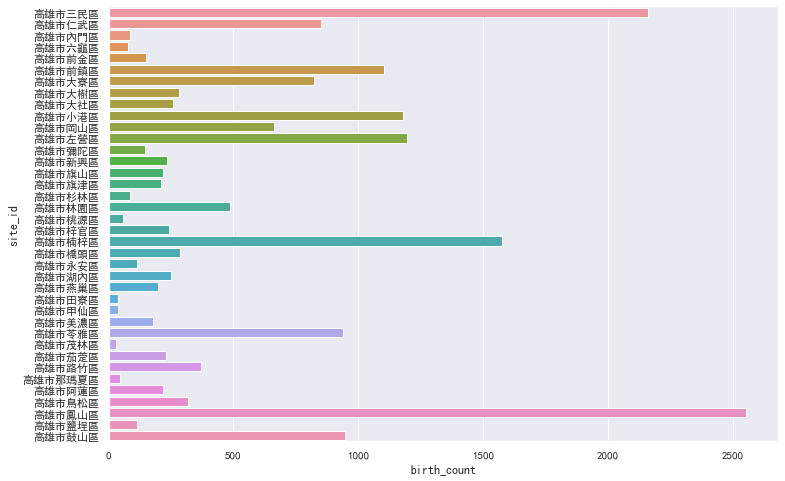

In [8]:
# 顯示高雄各區的出生人數
kaohsiung = taiwan_data[taiwan_data['city'] == '高雄市']
kaohsiung_region = kaohsiung.groupby('site_id')
kaohsiung_region_sum = kaohsiung_region.sum()
kaohsiung_region_sum.reset_index(inplace=True)
plt.figure(figsize=(12,8))
sns.barplot(x='birth_count', y='site_id', data=kaohsiung_region_sum)

<AxesSubplot:xlabel='birth_count', ylabel='mother_age'>

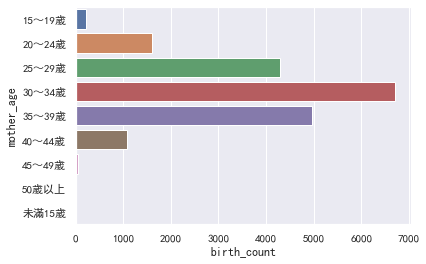

In [9]:
# 依母親年紀區分出生人數
kaohsiung_mother_age = kaohsiung.groupby('mother_age')
df2 = kaohsiung_mother_age.sum()
df2.reset_index(inplace=True)
sns.barplot(x='birth_count', y='mother_age', data=df2)

In [11]:
# 獲得每一個縣市的總生育率
city_group = taiwan_data.groupby('city')
city_group_total = city_group.sum()
# 為了與城市經緯度做 Merge 改名。
city_group_total.index.rename('COUNTYNAME', inplace=True)
city_group_total

id  statistic_yyy  birth_count
COUNTYNAME                                       
南投縣          79664715         229554         3142
嘉義市          18738378          35316         1426
嘉義縣         127074906         317844         2922
基隆市          64206513         123606         2007
宜蘭縣          51649164         211896         2854
屏東縣         255054987         582714         4441
彰化縣         146023722         459108        12096
新北市          11037951         512082        26181
新竹市          27910737          52974         3583
新竹縣          60217911         229554         4308
桃園市          16206723         229554        21444
澎湖縣          54010638         105948          996
臺中市          52136055         512082        19613
臺北市          11023452         211896        19029
臺南市          98562339         653346        10783
臺東縣         133950672         282528         1364
花蓮縣         113781915         229554         2175
苗栗縣          90700722         317844         2795
連江縣          38421540          70632          117
金門縣          56844990         105948         1035
雲林縣         131221620         353160         4009
高雄市         138623886         671004        18929

In [12]:
# Import繪製地圖的程式庫與geopandas
import folium
import geopandas as gpd

In [15]:
tw_region = gpd.read_file('./data/COUNTY_MOI_1090820.json')
tw_region

COUNTYID COUNTYCODE COUNTYNAME          COUNTYENG  \
0         Z      09007        連江縣  Lienchiang County   
1         G      10002        宜蘭縣       Yilan County   
2         N      10007        彰化縣    Changhua County   
3         M      10008        南投縣      Nantou County   
4         P      10009        雲林縣      Yunlin County   
5         C      10017        基隆市       Keelung City   
6         A      63000        臺北市        Taipei City   
7         F      65000        新北市    New Taipei City   
8         B      66000        臺中市      Taichung City   
9         D      67000        臺南市        Tainan City   
10        H      68000        桃園市       Taoyuan City   
11        K      10005        苗栗縣      Miaoli County   
12        I      10020        嘉義市        Chiayi City   
13        Q      10010        嘉義縣      Chiayi County   
14        W      09020        金門縣      Kinmen County   
15        E      64000        高雄市     Kaohsiung City   
16        V      10014        臺東縣     Taitung County   
17        U      10015        花蓮縣     Hualien County   
18        X      10016        澎湖縣      Penghu County   
19        O      10018        新竹市       Hsinchu City   
20        J      10004        新竹縣     Hsinchu County   
21        T      10013        屏東縣    Pingtung County   

                                             geometry  
0   MULTIPOLYGON (((119.96445 25.94552, 119.96455 ...  
1   MULTIPOLYGON (((121.95971 24.84494, 121.95974 ...  
2   POLYGON ((120.45655 24.20719, 120.45654 24.206...  
3   POLYGON ((121.34301 24.22355, 121.34280 24.223...  
4   MULTIPOLYGON (((120.08108 23.52412, 120.08104 ...  
5   MULTIPOLYGON (((121.80350 25.13621, 121.80337 ...  
6   POLYGON ((121.57098 25.19717, 121.57095 25.197...  
7   POLYGON ((121.70965 25.17657, 121.70927 25.176...  
8   POLYGON ((121.45201 24.36468, 121.45167 24.365...  
9   POLYGON ((120.65344 23.22454, 120.65296 23.224...  
10  POLYGON ((121.28338 25.11781, 121.28197 25.117...  
11  POLYGON ((121.01001 24.64398, 121.00975 24.644...  
12  POLYGON ((120.44758 23.51819, 120.44736 23.518...  
13  MULTIPOLYGON (((120.15192 23.39274, 120.15195 ...  
14  MULTIPOLYGON (((118.23381 24.16277, 118.23352 ...  
15  MULTIPOLYGON (((114.36981 10.37994, 114.36923 ...  
16  MULTIPOLYGON (((121.61180 21.94290, 121.61236 ...  
17  POLYGON ((121.77406 24.31528, 121.77272 24.313...  
18  MULTIPOLYGON (((119.44025 23.22137, 119.43995 ...  
19  POLYGON ((120.93542 24.71260, 120.93549 24.712...  
20  POLYGON ((121.03868 24.94578, 121.03866 24.946...  
21  MULTIPOLYGON (((120.82649 21.75615, 120.82652 ...

In [16]:
taiwan_region_birth = tw_region.merge(city_group_total,on="COUNTYNAME")
taiwan_region_birth.head()

COUNTYID COUNTYCODE COUNTYNAME          COUNTYENG  \
0        Z      09007        連江縣  Lienchiang County   
1        G      10002        宜蘭縣       Yilan County   
2        N      10007        彰化縣    Changhua County   
3        M      10008        南投縣      Nantou County   
4        P      10009        雲林縣      Yunlin County   

                                            geometry         id  \
0  MULTIPOLYGON (((119.96445 25.94552, 119.96455 ...   38421540   
1  MULTIPOLYGON (((121.95971 24.84494, 121.95974 ...   51649164   
2  POLYGON ((120.45655 24.20719, 120.45654 24.206...  146023722   
3  POLYGON ((121.34301 24.22355, 121.34280 24.223...   79664715   
4  MULTIPOLYGON (((120.08108 23.52412, 120.08104 ...  131221620   

   statistic_yyy  birth_count  
0          70632          117  
1         211896         2854  
2         459108        12096  
3         229554         3142  
4         353160         4009

In [17]:
m = folium.Map(location=[23.858987, 120.917631],zoom_start=8)

folium.TileLayer('CartoDB positron', name="Light Map").add_to(m)

style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', 
                            'fillOpacity': 0.1, 
                            'weight': 0.1}
highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}

folium.GeoJson(
	taiwan_region_birth,
	style_function=style_function,
	control=False,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields=['COUNTYNAME','birth_count'],
        aliases=['城市: ','出生人數: '],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
    )
).add_to(m)
m.keep_in_front()
m